In [44]:
## Figure 9 - Compare DEM error correction on Cerro Azul with ALOS data and show the estimated step functions

import os
import numpy as np
from matplotlib import pyplot as plt, ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pysar.plot_network as pnet
from pysar.simulation.plot import *
from pysar.objects import sensor, timeseries
from pysar.utils import ptime, readfile, plot as pp, utils as ut
from pysar import view

work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/DEM_ERR')
os.chdir(work_dir)
print('Go to diretory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

ts_files = ['timeseries_ECMWF_ramp.h5', 
            'timeseries_ECMWF_ramp_demErrOrig.h5', 
            'timeseries_ECMWF_ramp_demErrExt.h5']
geom_file = '../INPUTS/geometryGeo.h5'
dem_file = '../../DEM/srtm1.dem'

num_file = len(ts_files)
obj = timeseries(ts_files[0])
obj.open()
dates, datevector = ptime.date_list2vector(obj.dateList)

## Point of Interest
pts_lat, pts_lon = -0.928, -91.270
coord = ut.coordinate(obj.metadata, geom_file)
pts_y, pts_x = coord.geo2radar(pts_lat, pts_lon)[0:2]
print('Done.')

Go to diretory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/DEM_ERR
open timeseries file: timeseries_ECMWF_ramp.h5
Done.


In [2]:
## Run PYSAR commands to get the comparison result
cmd = 'cp ../exclude_date.txt ../maskTempCoh.h5 ../GEOCODE/geo_maskTempCoh.h5 .\n'
cmd += 'remove_ramp.py ../timeseries_ECMWF.h5 -s linear -m maskTempCoh.h5 -o ./timeseries_ECMWF_ramp.h5'
print(cmd)
os.system(cmd)

cmd  = 'dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrOrig.h5\n'
cmd += 'dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrExt.h5 --ex exclude_date.txt -s 20080529\n'
print(cmd)
os.system(cmd)

cmd = 'geocode.py timeseriesStepModel.h5 -l ../INPUTS/geometryGeo.h5\n'
print(cmd)
os.system(cmd)

cp ../exclude_date.txt ../maskTempCoh.h5 ../GEOCODE/geo_maskTempCoh.h5 .
remove_ramp.py ../timeseries_ECMWF.h5 -s linear -m maskTempCoh.h5 -o ./timeseries_ECMWF_ramp.h5
dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrOrig.h5
dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrExt.h5 --ex exclude_date.txt -s 20080529

geocode.py timeseriesStepModel.h5 -l ../INPUTS/geometryGeo.h5



0

Estimated DEM error on (N-0.928, E-91.27): [[2.0262203]] m
save figure to file: SierraNegraAlosAT133_dem_err_compare.png


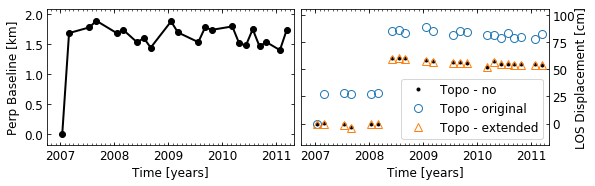

In [92]:
## Plot

# read data
box = (pts_x, pts_y, pts_x+1, pts_y+1)
dis_ts = np.zeros((obj.numDate, num_file))
for i in range(num_file):
    dis = readfile.read(ts_files[i], box=box)[0].flatten() * 100.
    dis -= dis[0]
    dis_ts[:, i] = dis
dem_err = readfile.read('demErr.h5', box=box)[0]
print('Estimated DEM error on (N{}, E{}): {} m'.format(pts_lat, pts_lon, dem_err))

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[9, 2.5])

# perp baseline history
ax = axs[0]
ax.plot(dates, obj.pbase/1000., '-ko', lw=2, ms=6, mfc='k')
# axis format
ax = pp.auto_adjust_yaxis(ax, obj.pbase/1000., fontsize=font_size)
ax.set_ylabel('Perp Baseline [km]', fontsize=font_size)

# displacement time-series
ax = axs[1]
ax.plot(dates, dis_ts[:, 0], 'k.', ms=6, label='Topo - no')
ax.plot(dates, dis_ts[:, 1], 'o',  ms=8, mfc='none', color=pp.mplColors[0], label='Topo - original')
ax.plot(dates, dis_ts[:, 2], '^',  ms=8, mfc='none', color=pp.mplColors[1], label='Topo - extended')
ax.set_ylim(-20, 105)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('LOS Displacement [cm]', fontsize=font_size, labelpad=0)
ax.legend(fontsize=font_size)
fig.subplots_adjust(wspace=0.03)

for ax in axs:
    pp.auto_adjust_xaxis_date(ax, datevector, fontsize=font_size, every_year=1)[0]
    ax.set_xlabel('Time [years]', fontsize=font_size)
    ax.tick_params(which='both', direction='in', labelsize=font_size, top=True, bottom=True, left=True, right=True)

out_file = '{}_dem_err_compare.png'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()

save figure to file: CerroAzul_dikeIntrusion_step.png


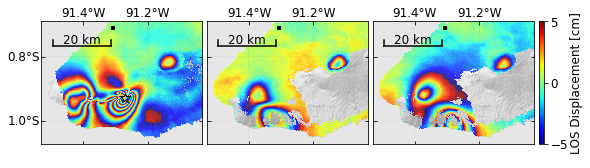

In [107]:
## Plot - 
print_msg = False
fnames = ['~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/DEM_ERR/geo_timeseriesStepModel.h5 20080529',
          '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/DEM_ERR/geo_timeseriesStepModel.h5 20170319',
          '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/DEM_ERR/geo_timeseriesStepModel.h5 20170321']
dnames = ['~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/DEM/srtm1.dem',
          '~/insarlab/Galapagos/GalapagosSenDT128/DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84',
          '~/insarlab/Galapagos/GalapagosSenDT128/DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84']
lalo_locs = ['--lalo-loc 1 0 1 0',
             '--lalo-loc 0 0 1 0',
             '--lalo-loc 0 0 1 0']
fnames = [os.path.expanduser(i) for i in fnames]
dnames = [os.path.expanduser(i) for i in dnames]

# Plot
num_file = len(fnames)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[9, 3])
for i in range(num_file):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dnames[i])
    cmd += '--sub-lat -1.07 -0.69 --sub-lon -91.53 -91.03 --ref-lalo -0.708 -91.310 '
    cmd += '--wrap --wrap-range -5 5 --fontsize 12 --scalebar 0.3 0.25 0.8 '
    cmd += '--notitle --lalo-step 0.2 --nocbar {} --ref-size 3 '.format(lalo_locs[i])

    ax = axs[i]
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps, print_msg=print_msg)

# POI
axs[0].plot(pts_lon, pts_lat, '*', ms=10, mfc='none', color='k', mew=1)

# colorbar
for ax in axs:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad="3%")
    if ax != axs[-1]:
        cax.axis('off')
cbar = plt.colorbar(im, cax=cax, ticks=[-5, 0, 5])
#cax = fig.add_axes([0.39, 0.23, 0.25, 0.015])
#cbar = plt.colorbar(im, cax=cax, ticks=[-5, 5], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('LOS Displacement [cm]', fontsize=font_size, labelpad=2)

fig.subplots_adjust(wspace=-0.03)
out_file = 'CerroAzul_dikeIntrusion_step.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()